<a href="https://colab.research.google.com/github/eternaldemon/Deep-Learning/blob/master/SimpleRNN_on_a_Sine_Wave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
from tensorflow.keras.layers import SimpleRNN,Input,Dense,Flatten

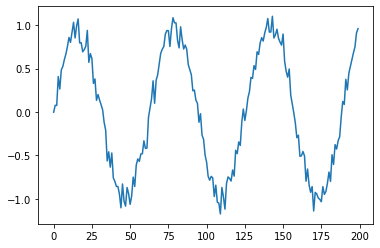

In [59]:
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1

plt.plot(series)
plt.show()

In [60]:
# Building the dataset

T=10  # It means we are going to use 10 time steps to predict a next timestep
D=1
X=[]
Y=[]

for t in range(len(series)-T):
  x=series[t:t+T]
  X.append(x)
  y=series[t+T]
  Y.append(y)

X = np.reshape(X,(-1,T,1))
N = len(X)
X,Y = np.array(X),np.array(Y)
print(X.shape)
print(Y.shape)

(190, 10, 1)
(190,)


In [75]:
# Model

i = Input(shape=(T,D))
o = SimpleRNN(5)(i)  # Default activation for a SimpleRNN layer is tanh. Also no activation makes it a linear model.
o = Dense(1)(o)
model = Model(i,o)

model.compile(loss='mse',optimizer='adam')

In [76]:
xtrain = X[:-N//2,:]
ytrain = X[:-N//2]

In [77]:
xtrain.shape

(95, 10, 1)

In [78]:
his = model.fit(xtrain,ytrain,epochs=1000,verbose=1,validation_data=(X[-N//2:,:],Y[-N//2:]))

Epoch 1/1000
3/3 [==============================] - 0s 58ms/step - loss: 0.0855 - val_loss: 0.0647
Epoch 2/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.0820 - val_loss: 0.0628
Epoch 3/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0796 - val_loss: 0.0622
Epoch 4/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0777 - val_loss: 0.0627
Epoch 5/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0761 - val_loss: 0.0641
Epoch 6/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.0751 - val_loss: 0.0657
Epoch 7/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.0741 - val_loss: 0.0675
Epoch 8/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.0734 - val_loss: 0.0694
Epoch 9/1000
3/3 [==============================] - 0s 15ms/step - loss: 0.0725 - val_loss: 0.0714
Epoch 10/1000
3/3 [==============================] - 0s 16ms/step - loss: 0.0718 - val_loss: 0.0734
Epoch 11/

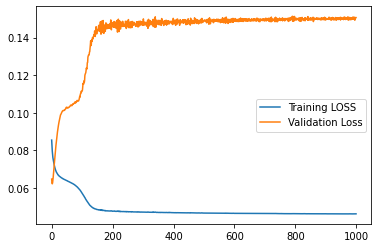

In [79]:
plt.plot(his.history['loss'],label='Training LOSS')
plt.plot(his.history['val_loss'],label='Validation Loss')
plt.legend()
plt.show()

In [80]:
i = -N//2

print(X[i].shape)
print(X.shape)

# It means X has 190 entries each with length (10,1). So, single entry is of shape (10,1). But, input for model needs to be of size NxTxD i.e 1xTx1.
# Therefore, we reshape it. Also output will be of shape NxK where N is no of samples and K is the number of output nodes

(10, 1)
(190, 10, 1)


In [81]:
# Wrong Forecast method

validation_target = Y[-N//2:]
validation_predictions = []

i = -N//2  # or N//2 doesn't matter since it is at half point

while len(validation_predictions) < len(validation_target):
  p = model.predict(X[i].reshape(1,T,D))[0,0]
  i = i+1

  validation_predictions.append(p)

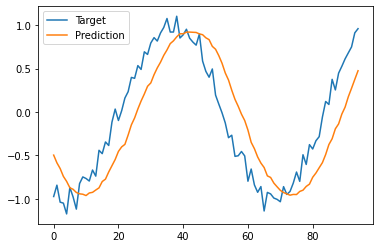

In [82]:
plt.plot(validation_target,label='Target')
plt.plot(validation_predictions,label='Prediction')
plt.legend()
plt.show()

In [83]:
# Correct forecast method

validation_target = Y[-N//2:]
validation_predictions = []

last_x = X[-N//2]

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1,-1,1))[0,0]

  validation_predictions.append(p)

  last_x = np.roll(last_x,-1)
  last_x[-1] = p

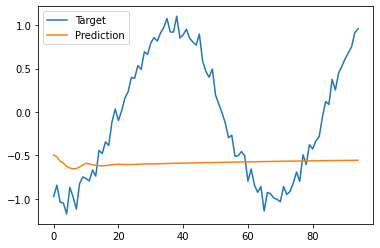

In [85]:
plt.plot(validation_target,label='Target')
plt.plot(validation_predictions,label='Prediction')
plt.legend()
plt.show()

# This shows RNN performs worse than a linear model in some cases.